<a href="https://colab.research.google.com/github/mohammedaymanulhaque-dev/projects/blob/main/DECISION_TREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classifier
**Objective:** Build and visualize a Decision Tree Classifier to predict flower species using the famous *Iris dataset*.  



##Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Optional: make results reproducible
np.random.seed(42)


##Load and Explore the Dataset
We’ll use the built-in Iris dataset from scikit-learn.  
It contains 150 samples of 3 species: *setosa*, *versicolor*, *virginica* — each with 4 features.


##LOAD THE DATASET

In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Map numeric labels to actual names
y = y.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Dataset shape:", X.shape)
X.head()


Dataset shape: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


##Split the data into training and testing sets
We’ll train on 80% of the data and test on the remaining 20%.


##TRAIN-TEST SPLIT

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 120
Testing samples: 30


##Train the Decision Tree Classifier
We’ll use Gini Index as the splitting criterion (default).  
You can also use “entropy” to apply Information Gain.


In [4]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


##MODEL EVALUATION

In [5]:
y_pred = dtree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat_df = pd.DataFrame(conf_mat, index=iris.target_names, columns=iris.target_names)
print("\nConfusion Matrix:")
print(conf_mat_df)


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0           9          0
virginica        0           0         11


##Visualize the Decision Tree
We’ll plot the tree structure to see how the model splits data at each node.


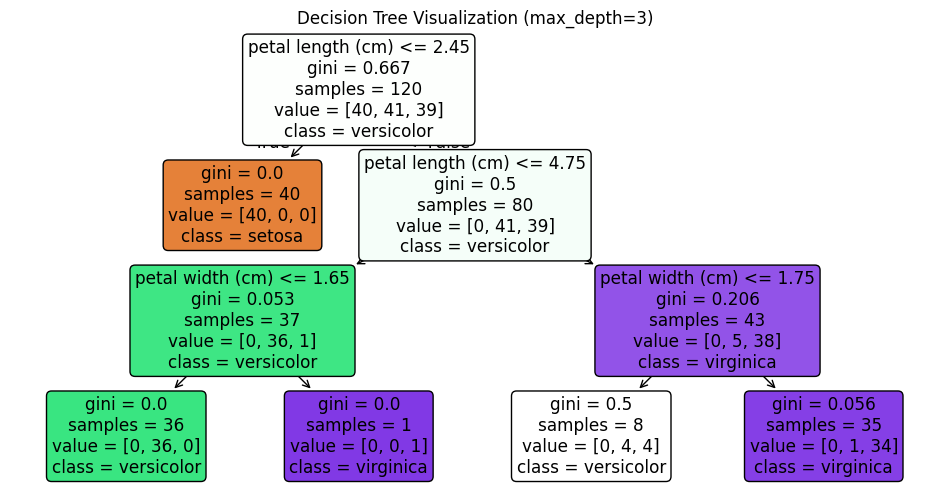

In [6]:
plt.figure(figsize=(12, 6))
plot_tree(dtree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title("Decision Tree Visualization (max_depth=3)")
plt.show()


##Make Sample Predictions
Let’s test the model on new sample inputs.


In [7]:
sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # sample features
predicted = dtree.predict(sample)
print(f"Predicted Species: {predicted[0]}")


Predicted Species: setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
